In [39]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.datasets import load_boston, load_iris
from sklearn.preprocessing import StandardScaler ,MinMaxScaler
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

# 선형 모델(Linear Models)

* 선형 모델은 과거 부터 지금 까지 널리 사용되고 연구 되고 있는 기계학습 방법
* 선형 모델은 입력 데이터에 대한 선형 함수를 만들어 예측 수행

* 회귀 분석을 위한 선형 모델은 다음과 같이 정의
\begin{equation}
\hat{y}(w,x) = b + w x
\end{equation}
\begin{equation}
\hat{y}(w,x) = b + w_1 x_1 + ... + w_p x_p
\end{equation}

  + $x$: 입력 데이터
  + $w$: 모델이 학습할 파라미터
  + $b$: 편향
  + $w_1$~$w_p$: 가중치

## 선형 회귀(Linear Regression)

* **선형 회귀(Linear Regression)**또는 **최소제곱법(Ordinary Least Squares)**은 가장 간단한 회귀 분석을 위한 선형 모델
* 선형 회귀는 모델의 예측과 정답 사이의 **평균제곱오차(Mean Squared Error)**를 최소화 하는 학습 파라미터 $w$를 찾음
* 평균제곱오차는 아래와 같이 정의

\begin{equation}
MSE = \frac{1}{N} \sum_{i=1}^{N}(y_i - \hat{y}_i)^2
\end{equation}

  + $y$: 정답
  + $\hat{y}$: 예측 값을 의미

* 선형 회귀 모델에서 사용하는 다양한 오류 측정 방법
  + MAE(Mean Absoulte Error)
  + MAPE(Mean Absolute Percentage Error)
  + MSE(Mean Squared Error)
  + MPE(Mean Percentage Error)

In [7]:
df = pd.read_csv( 'data/data-01.csv', header=None)
df.columns = ['q1','q2','midterm','final']
df

,q1,q2,midterm,final
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142
5,53,46,55,101
6,69,74,77,149
7,47,56,60,115
8,87,79,90,175
9,79,70,88,164


In [8]:
x_data = df[['q1','q2','midterm']]  # df.iloc[:, :-1]
x_data

,q1,q2,midterm
0,73,80,75
1,93,88,93
2,89,91,90
3,96,98,100
4,73,66,70
5,53,46,55
6,69,74,77
7,47,56,60
8,87,79,90
9,79,70,88


In [11]:
y_data = df[['final']]# df.iloc[:, [-1]]
y_data

,final
0,152
1,185
2,180
3,196
4,142
5,101
6,149
7,115
8,175
9,164


In [12]:
model_lr = LinearRegression()
model_lr.fit(x_data,y_data)

LinearRegression()

In [13]:
model_lr.coef_

array([[0.35593822, 0.54251876, 1.16744422]])

In [14]:
model_lr.intercept_

array([-4.3361024])

In [15]:
# q1:70점 q2:75점 midterm:75 점인 경우 예측값
# w1xx1+w2*x2+w3*x3 + b
70*0.35593822 + 75*0.54251876 + 75*1.16744422 + (-4.3361024)

148.8267965

In [17]:
model_lr.predict( [[70,75,75]])  # 1x3 3x1

array([[148.82679595]])

In [19]:
model_lr.predict( [[70,75,75], [60,45,50]]) # 2x3 3x1

array([[148.82679595],
       [ 99.80574563]])

In [18]:
a = np.array( [[1,2],[3,4]])
b = np.array( [[5,6],[7,8]])
np.matmul( a,b )

array([[19, 22],
       [43, 50]])

In [ ]:
2x3 3x4 행렬곱 2x4
2x4 3x4

In [20]:
model_lr.score( x_data, y_data )

0.98966157894484

In [22]:
x_data.shape

(25, 3)

In [23]:
p =model_lr.predict( x_data) # 25x3 3x1 => 25x1
p

array([[152.60720439],
       [185.08011472],
       [181.78158547],
       [199.74522647],
       [139.1747207 ],
       [103.69391793],
       [150.2632274 ],
       [112.82069728],
       [174.55948394],
       [164.49442094],
       [143.42337551],
       [142.23416416],
       [186.54285759],
       [152.40794527],
       [151.24409108],
       [189.12496613],
       [143.50219218],
       [181.89389361],
       [177.29838914],
       [158.34934019],
       [176.57742415],
       [174.66365778],
       [167.68889392],
       [150.63279846],
       [191.1954116 ]])

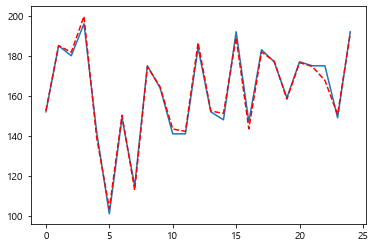

In [24]:
plt.plot( y_data )
plt.plot( p, 'r--')
plt.show()

In [26]:
boston = load_boston()

In [28]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [29]:
boston['data']

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [32]:
boston['data'].shape

(506, 13)

In [30]:
boston['target']

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21

In [31]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

### 보스턴 주택 가격 데이터

* 주택 가격 데이터는 도시에 대한 분석과 부동산, 경제적인 정보 분석 등 많은 활용 가능한 측면들이 존재
* 보스턴 주택 가격 데이터는 카네기 멜론 대학교에서 관리하는 StatLib 라이브러리에서 가져온 것
* 헤리슨(Harrison, D.)과 루빈펠트(Rubinfeld, D. L.)의 논문 "Hedonic prices and the demand for clean air', J. Environ. Economics & Management"에서 보스턴 데이터가 사용
* 1970년도 인구 조사에서 보스턴의 506개 조사 구역과 주택 가격에 영향을 주는 속성 21개로 구성

| 속성 | 설명 |
|------|------|
| CRIM | 자치시(town)별 1인당 범죄율 |
| ZN | 25,000 평방 피트가 넘는 거주지역 토지 비율 |
| INDUS | 자치시(town)별 비소매 상업지역 토지 비율 |
| CHAS | 찰스 강(Charles River)에 대한 변수 (강의 경계에 위치하면 1, 그렇지 않으면 0) |
| NOX | 10,000,000당  일산화질소 농도 |
| RM | 주택 1가구당 평균 방의 수 |
| AGE | 1940년 이전에 건축된 소유주택 비율 |
| DIS | 5개의 보스턴 고용 센터까지의 가중 거리 |
| RAD | 방사형 고속도로 접근성 지수 |
| TAX | 10,000 달러당 재산 세율 |
| PTRATIO | 자치시(town)별 학생/교사 비율 |
| B | 1000(Bk-0.63)^2, Bk: 자치시별 흑인 비율 |
| LSTAT | 모집단의 하위계층 비율(%) |
| MEDV | 소유자가 거주하는 주택가격(중앙값) (단위: 1,000 달러) |

In [33]:
boston_df = pd.DataFrame( boston['data'], columns = boston['feature_names'])
boston_df['MEDV'] = boston['target']
boston_df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


# 문제

0.02731	0.0	7.07	0.0	0.469	6.421	78.9	4.9671	2.0	242.0	17.8	396.90	9.14
주택가격을 예측하시요.

In [34]:
x_data = boston_df.drop('MEDV', axis=1) # boston_df.iloc[:, :-1]
y_data = boston_df[['MEDV']] # boston_df.iloc[:, [-1] ]

boston_lr = LinearRegression()
boston_lr.fit(x_data, y_data)

LinearRegression()

In [35]:
boston_lr.coef_

array([[-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,
         2.68673382e+00, -1.77666112e+01,  3.80986521e+00,
         6.92224640e-04, -1.47556685e+00,  3.06049479e-01,
        -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
        -5.24758378e-01]])

In [36]:
model_lr.intercept_

array([-4.3361024])

In [37]:
boston_lr.predict([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

array([[25.02556238]])

In [42]:
#결론 :다중( scale)
x_data.values

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [46]:
y_data.values

array([[24. ],
       [21.6],
       [34.7],
       [33.4],
       [36.2],
       [28.7],
       [22.9],
       [27.1],
       [16.5],
       [18.9],
       [15. ],
       [18.9],
       [21.7],
       [20.4],
       [18.2],
       [19.9],
       [23.1],
       [17.5],
       [20.2],
       [18.2],
       [13.6],
       [19.6],
       [15.2],
       [14.5],
       [15.6],
       [13.9],
       [16.6],
       [14.8],
       [18.4],
       [21. ],
       [12.7],
       [14.5],
       [13.2],
       [13.1],
       [13.5],
       [18.9],
       [20. ],
       [21. ],
       [24.7],
       [30.8],
       [34.9],
       [26.6],
       [25.3],
       [24.7],
       [21.2],
       [19.3],
       [20. ],
       [16.6],
       [14.4],
       [19.4],
       [19.7],
       [20.5],
       [25. ],
       [23.4],
       [18.9],
       [35.4],
       [24.7],
       [31.6],
       [23.3],
       [19.6],
       [18.7],
       [16. ],
       [22.2],
       [25. ],
       [33. ],
       [23.5],
       [19

In [43]:
scaleX = StandardScaler() # numpy( ndarray)  matrix
x_dataS = scaleX.fit_transform( x_data.values )

In [44]:
x_dataS

array([[-0.41978194,  0.28482986, -1.2879095 , ..., -1.45900038,
         0.44105193, -1.0755623 ],
       [-0.41733926, -0.48772236, -0.59338101, ..., -0.30309415,
         0.44105193, -0.49243937],
       [-0.41734159, -0.48772236, -0.59338101, ..., -0.30309415,
         0.39642699, -1.2087274 ],
       ...,
       [-0.41344658, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.98304761],
       [-0.40776407, -0.48772236,  0.11573841, ...,  1.17646583,
         0.4032249 , -0.86530163],
       [-0.41500016, -0.48772236,  0.11573841, ...,  1.17646583,
         0.44105193, -0.66905833]])

In [50]:
x_train, x_test, y_train, y_test = train_test_split(x_dataS, y_data.values,  test_size=0.2 ,  random_state=1 ) #ndarray 

In [ ]:
a,b,c = [1,2,3]

In [ ]:
# [np.array([...]),np.array([...]),np.array([...]),np.array([...])]

In [49]:
result

[array([[-0.40405061, -0.48772236, -0.61672651, ..., -0.2568579 ,
          0.29270416, -0.95921806],
        [-0.40254357,  0.58526684, -0.87644514, ...,  0.57539459,
          0.37285362, -0.81203559],
        [ 1.53592609, -0.48772236,  1.01599907, ...,  0.80657583,
          0.44105193,  2.54512652],
        ...,
        [ 0.26283202, -0.48772236,  1.01599907, ...,  0.80657583,
          0.44105193,  0.94153844],
        [-0.38206188, -0.48772236, -0.72032214, ..., -0.48803915,
          0.22012011, -0.24853698],
        [-0.41119127, -0.48772236, -0.75534039, ...,  0.34421334,
          0.44105193, -0.54430367]]),
 array([[-0.41477789,  0.92862338, -1.30687771, ..., -0.02567665,
          0.44105193, -0.71811916],
        [-0.41755805,  1.87285388, -1.07342276, ..., -0.39556665,
          0.44105193, -0.76717998],
        [-0.39383653, -0.48772236, -0.61672651, ..., -0.2568579 ,
          0.3954402 ,  0.86163938],
        ...,
        [-0.40795725, -0.48772236, -0.37597609, ...,  

In [52]:
x_train.shape

(404, 13)

In [53]:
x_test.shape

(102, 13)

In [54]:
y_train.shape

(404, 1)

In [55]:
y_test.shape

(102, 1)

In [56]:
modelSGD = SGDRegressor(verbose=1)
modelSGD.fit( x_train, y_train )

-- Epoch 1
Norm: 4.63, NNZs: 13, Bias: 15.624318, T: 404, Avg. loss: 100.646069
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 4.58, NNZs: 13, Bias: 19.523887, T: 808, Avg. loss: 25.270866
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 4.98, NNZs: 13, Bias: 21.082748, T: 1212, Avg. loss: 14.829256
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 5.27, NNZs: 13, Bias: 21.819664, T: 1616, Avg. loss: 12.691791
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 5.44, NNZs: 13, Bias: 22.173964, T: 2020, Avg. loss: 12.019379
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 5.63, NNZs: 13, Bias: 22.372221, T: 2424, Avg. loss: 11.748129
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 5.73, NNZs: 13, Bias: 22.475466, T: 2828, Avg. loss: 11.603751
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 5.77, NNZs: 13, Bias: 22.524867, T: 3232, Avg. loss: 11.552196
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 5.88, NNZs: 13, Bias: 22.562654, T: 3636, Avg. loss: 11.492531
T

C:\Users\medici\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SGDRegressor(verbose=1)

In [60]:
modelSGD.score( x_train, y_train)

0.7273192523570544

In [61]:
modelSGD.score( x_test, y_test)

0.7632745787581774

In [ ]:
#train 점수
#test 점수 
- 테스트점수가 많이낮으면(과적합)
- 테스트점수가 많이 높으면( 과소적합)

In [59]:
modelSGD.predict( [x_test[0]] )

array([31.72111346])

In [57]:
x_test[0]

array([-0.41477789,  0.92862338, -1.30687771, -0.27259857, -0.71434722,
        0.80402837,  0.0613455 , -0.29108882, -0.29308074, -1.10611514,
       -0.02567665,  0.44105193, -0.71811916])

In [58]:
y_test[0]

array([28.2])

In [64]:
xd =scaleX.transform( [[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

In [65]:
modelSGD.predict( xd )

array([24.94856943])

In [ ]:
# modelSGD.predict([[0.02731, 0.0, 7.07, 0.0, 0.469, 6.421, 78.9, 4.9671, 2.0, 242.0, 17.8, 396.90, 9.14]])

# 근웅형님 답

In [ ]:
x_data, y_data = iris_df.iloc[:,1:-1].values, iris_df.iloc[:,0].values
scaler_x = StandardScaler()
scaler_x.fit(x_data)
x_data_scale =  scaler_x.transform(x_data)

x_train, x_test, y_train, y_test = train_test_split(x_data_scale, y_data , test_size=0.2, random_state=1)

model_sgd = SGDRegressor()
model_sgd.fit(x_train, y_train)

print('train 점수:', model_sgd.score(x_train, y_train))
print('test 점수:', model_sgd.score(x_test, y_test))

pred = model_sgd.predict([[3.0, 1.4, 0.2]])
print('예측값:', pred)